![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

### Linear Regression

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head(10)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200
7,"город Ташкент, Яккасарайский район, Саламатина",Яккасарайский,2,32,5,5,20000
8,"город Ташкент, Учтепинский район, Чиланзар-21",Учтепинский,2,51,3,4,26200
9,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,1,30,1,4,22200


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [2]:
df['district'].value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [3]:
housing = df[df.district=='Чиланзарский']
housing.head()

,location,district,rooms,size,level,max_levels,price
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200


In [4]:
X = housing['size']
X

2       42
3       65
4       70
5       28
6       30
        ..
7504    70
7522    20
7533    32
7545    70
7564    30
Name: size, Length: 1641, dtype: object

In [5]:
y = housing['price']
y

2       37000
3       49500
4       55000
5       25500
6       21200
        ...  
7504    48000
7522    18500
7533    28000
7545    49800
7564    22914
Name: price, Length: 1641, dtype: object

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 2 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    1641 non-null   object
 1   district    1641 non-null   object
 2   rooms       1641 non-null   int64 
 3   size        1641 non-null   object
 4   level       1641 non-null   int64 
 5   max_levels  1641 non-null   int64 
 6   price       1641 non-null   object
dtypes: int64(3), object(4)
memory usage: 102.6+ KB


In [10]:
index = housing[housing.price == 'Договорная'].index

In [11]:
housing = housing.drop(index,axis = 0)

In [12]:
housing['size'] = housing['size'].astype(float)

In [17]:
housing.price = housing.price.astype(float)

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 2 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1631 non-null   object 
 1   district    1631 non-null   object 
 2   rooms       1631 non-null   int64  
 3   size        1631 non-null   float64
 4   level       1631 non-null   int64  
 5   max_levels  1631 non-null   int64  
 6   price       1631 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 101.9+ KB


**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

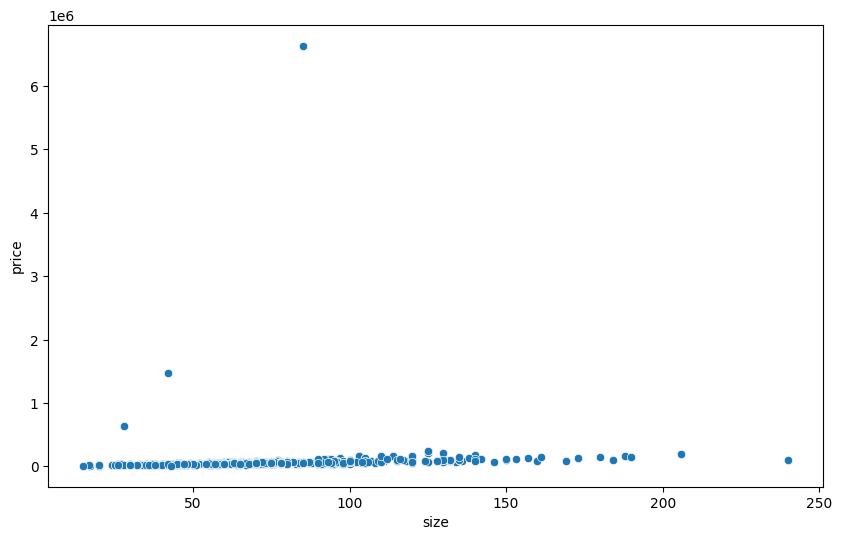

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

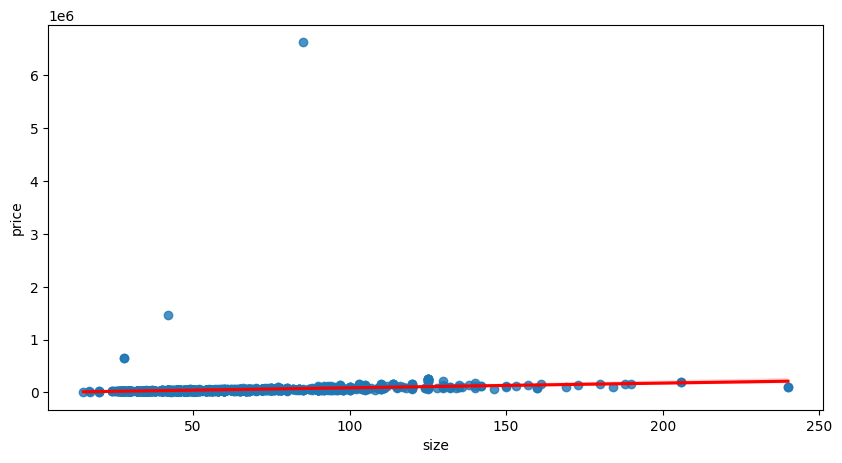

In [25]:
plt.figure(figsize=(10,5))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [27]:
x_ =housing['size'].mean()
y_ =housing['price'].mean()

In [36]:
nol_1 = sum(housing["size"].map(lambda x:x-x_)*housing["price"].map(lambda y:y-y_))/sum(housing["size"].map(lambda x:(x-x_)**2))
nol_0 = y_-nol_1*x_

In [37]:
nol_0

-3132.1570342366613

## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [48]:
predict = housing['size'].head().map(lambda x:nol_0+nol_1*x)
y = housing.price.head()

## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [49]:
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y,predict)

lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

3868.4450355408203
